In [46]:
#IMPORTING THE LIBRARIES

import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("/content/Folds5x2_pp.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [18]:
df.shape

(9568, 5)

In [19]:
df.rename(columns = {"AT":"Average Temperature",
                     "V": "Exhaust Vacuum",
                     "AP": "Ambient Pressure",
                     "RH": "Relative Humidity",
                     "PE": "Net Hourly Electrical Energy Output"},inplace = True)


df.head()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [20]:
df.isna().sum()

Average Temperature                    0
Exhaust Vacuum                         0
Ambient Pressure                       0
Relative Humidity                      0
Net Hourly Electrical Energy Output    0
dtype: int64

In [21]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Average Temperature                  9568 non-null   float64
 1   Exhaust Vacuum                       9568 non-null   float64
 2   Ambient Pressure                     9568 non-null   float64
 3   Relative Humidity                    9568 non-null   float64
 4   Net Hourly Electrical Energy Output  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [22]:
df.describe()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [23]:
df.corr()["Net Hourly Electrical Energy Output"].sort_values(ascending= False)

Net Hourly Electrical Energy Output    1.000000
Ambient Pressure                       0.518429
Relative Humidity                      0.389794
Exhaust Vacuum                        -0.869780
Average Temperature                   -0.948128
Name: Net Hourly Electrical Energy Output, dtype: float64

In [24]:
x = df.drop("Net Hourly Electrical Energy Output",axis = 1).values
y = df["Net Hourly Electrical Energy Output"].values

print(x),print(y)

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]]
[480.48 445.75 438.76 ... 465.96 450.93 451.67]


(None, None)

## splitting the dataset in train test

In [25]:
x_train,x_test,y_train,y_test = train_test_split(
                                            x,
                                            y,
                                            test_size = 0.2,
                                            random_state = 42
)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7654, 4), (1914, 4), (7654,), (1914,))

## Applying the scaling technique

In [27]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train = ss.fit_transform(x_train)

x_test = ss.transform(x_test)

x_train,x_test

(array([[ 0.74805289,  0.72006931, -0.32660017, -0.49711722],
        [ 0.86181948,  1.26515721, -0.98521113,  0.8181501 ],
        [ 0.93409473,  1.52314975,  0.32523844,  0.80167494],
        ...,
        [-0.22097078, -0.834965  ,  0.36756563, -0.83554456],
        [ 0.94747903,  1.14245344, -0.41971997, -0.45455637],
        [-1.77355014, -1.19049131,  1.92520594,  0.91837402]]),
 array([[ 1.34499288,  0.23869298, -1.28658067, -1.10532538],
        [ 0.81095912,  1.36269098, -0.74140656,  0.26485915],
        [-0.2437241 , -0.73900436,  1.99970178, -0.19713193],
        ...,
        [-0.67068342, -1.15902881, -0.29951077, -0.10651852],
        [ 1.31420898,  1.33752097, -0.87346737, -0.44288647],
        [-0.2611237 , -0.27021304,  0.37433797,  1.10646548]]))

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

## model.add id the function

In [30]:
model = Sequential()

model.add(Dense(units = 64,activation = "relu"))   # adding the 1st layer

model.add(Dense(units = 32,activation = "relu"))   # adding the 2nd layer

model.add(Dense(units = 1))                        # adding the output layer

In [31]:
model.compile(loss = "mean_squared_error",
              optimizer = "adam"
              )

In [32]:
model.fit(
        x = x_train,
        y = y_train,
        epochs = 100,
        batch_size = 32,
        validation_data = (x_test,y_test),
        callbacks = EarlyStopping(monitor = "val_loss",patience = 5)

)

Epoch 1/100
240/240 [==============================] - 2s 3ms/step - loss: 169172.4531 - val_loss: 79311.6641
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 27887.6836 - val_loss: 12245.6895
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 7990.7236 - val_loss: 4630.2661
Epoch 4/100
240/240 [==============================] - 1s 2ms/step - loss: 2864.1948 - val_loss: 1735.7402
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 1153.3489 - val_loss: 838.3281
Epoch 6/100
240/240 [==============================] - 1s 2ms/step - loss: 607.7448 - val_loss: 480.5777
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 363.2137 - val_loss: 292.7619
Epoch 8/100
240/240 [==============================] - 1s 3ms/step - loss: 222.8428 - val_loss: 182.1507
Epoch 9/100
240/240 [==============================] - 1s 3ms/step - loss: 142.8820 - val_loss: 115.7414
Epoch 10/100
240/240 [===================

In [33]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,169172.453125,79311.664062
1,27887.683594,12245.689453
2,7990.723633,4630.266113
3,2864.194824,1735.740234
4,1153.348877,838.328064
5,607.744751,480.577728
6,363.213715,292.761871
7,222.842773,182.150742
8,142.882004,115.741402
9,96.775040,81.078072


<Axes: >

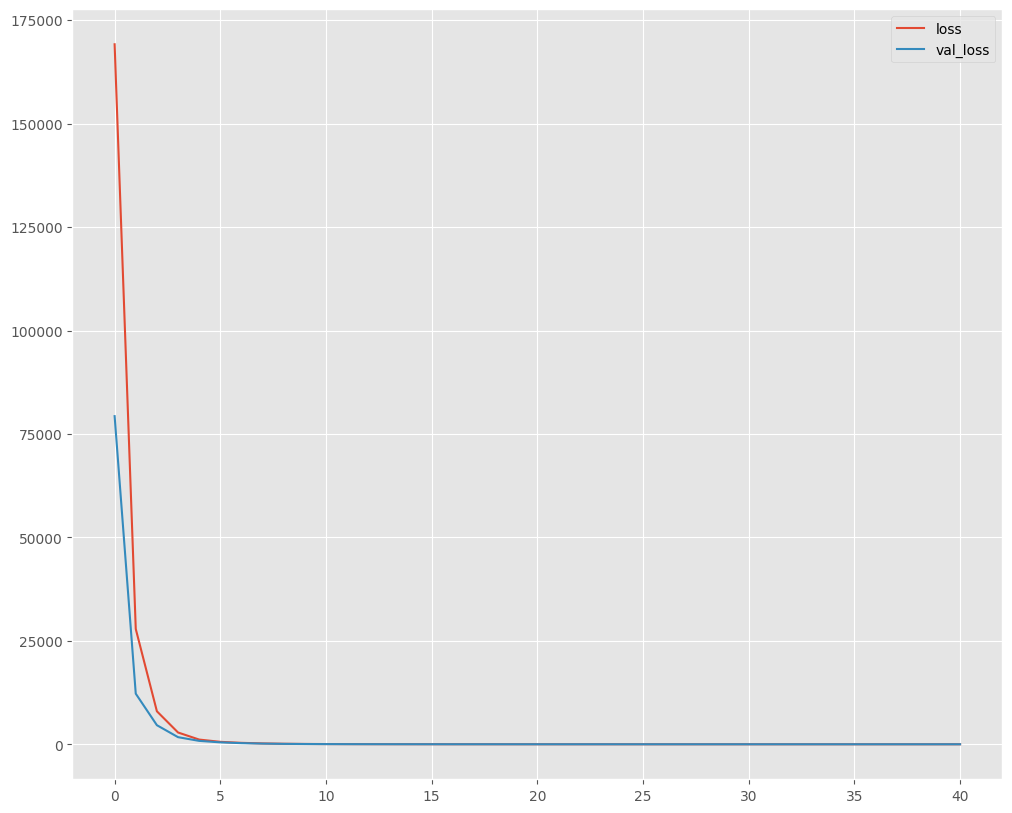

In [35]:
plt.style.use("ggplot")
pd.DataFrame(model.history.history).plot(figsize =(12,10))

In [36]:
model.evaluate(x_train,y_train)

240/240 [==============================] - 1s 3ms/step - loss: 21.1376


21.137617111206055

In [37]:
model.evaluate(x_test,y_test)

60/60 [==============================] - 0s 2ms/step - loss: 19.4154


19.415437698364258

In [38]:
predictions = model.predict(x_test)
prediction_df = pd.DataFrame(np.ravel(predictions),columns=["predictions"])
compare_df = pd.concat([pd.DataFrame(y_test,columns=["true_values"]),prediction_df],axis= 1)

compare_df

60/60 [==============================] - 0s 2ms/step


,true_values,predictions
0,433.27,437.202118
1,438.16,435.518707
2,458.42,457.825592
3,480.82,472.823669
4,441.41,436.264313
...,...,...
1909,456.70,449.054779
1910,438.04,432.942169
1911,467.80,466.227325
1912,437.14,432.880341


In [42]:
from sklearn import metrics

print("mae: ",metrics.mean_absolute_error(y_test,predictions))
print("mse :", metrics.mean_squared_error(y_test,predictions))
print("rmse : ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

mae:  3.458017947397262
mse : 19.415432770552783
rmse :  4.406294675864607


In [44]:
# evaluation of explained variance

metrics.explained_variance_score(y_test,predictions)

0.9369817949217418

<ipython-input-49-b90af5cc175e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions,bins=50)


<Axes: ylabel='Density'>

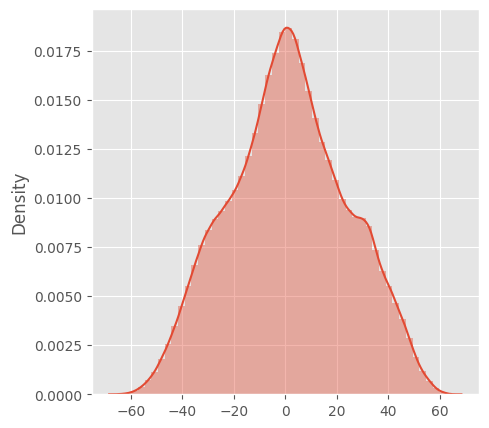

In [49]:
# visualizing the distribution of difference actual and predictions

plt.figure(figsize=(5,5))
sns.distplot(y_test-predictions,bins=50)


In [50]:
pip install skops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.5 MB/s eta 0:00:00


In [51]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 9.4 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5579

In [52]:
df.columns


Index(['Average Temperature', 'Exhaust Vacuum', 'Ambient Pressure',
       'Relative Humidity', 'Net Hourly Electrical Energy Output'],
      dtype='object')

In [57]:
import gradio as gr
import numpy as np
from sklearn.preprocessing import StandardScaler

def regressor(Average_Temperature, Exhaust_Vacuum, Ambient_Pressure,RelativeHumidity):

  input_data = np.asarray([Average_Temperature, Exhaust_Vacuum, Ambient_Pressure,RelativeHumidity])
  print(input_data)

  input_data_reshape = input_data.reshape(1,-1)

  x_test_scaling = ss.transform(input_data_reshape)

  prediction = model.predict(x_test_scaling)
  print(prediction)

  return prediction[0][0]


inputs = [
          gr.Slider(1,50,step = 1,label = "Average Temperature"),
          gr.Slider(1,100,step = 1,label = "Exhaust Vacuum"),
          gr.Slider(1,1100,step = 1,label = "Ambient Pressure"),
          gr.Slider(1,150,step = 1,label = "Relative Humidity")
]

title = "Net Hourly Electrical Energy Output"

description = "enter the details to predict Net Hourly Electrical Energy Output".title()

gr.Interface(
    fn = regressor,
    inputs = inputs,
    outputs = gr.outputs.Textbox(label="prections"),
    title = title,
    description = description

).launch(debug = True)





<ipython-input-57-2030fb4d0ea2>:34: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs = gr.outputs.Textbox(label="prections"),


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://97baf4659eff765169.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


[ 12  18 337  71]
1/1 [==============================] - 0s 23ms/step
[[3849.72]]
[ 31  47 650  95]
1/1 [==============================] - 0s 21ms/step
[[2131.0874]]
[ 12  18 337  71]
1/1 [==============================] - 0s 22ms/step
[[3849.72]]
[ 31  50 707 112]
1/1 [==============================] - 0s 21ms/step
[[1828.4907]]
[11  8  5  8]
1/1 [==============================] - 0s 37ms/step
[[5632.225]]
[ 31  47 650  95]
1/1 [==============================] - 0s 33ms/step
[[2131.0874]]


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


[12  7 70 15]
1/1 [==============================] - 0s 30ms/step
[[5281.956]]


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(


[ 38  66 803 119]
1/1 [==============================] - 0s 20ms/step
[[1333.192]]
[ 31  50 707 112]
1/1 [==============================] - 0s 21ms/step
[[1828.4907]]
[ 31  50 707 102]
1/1 [==============================] - 0s 30ms/step
[[1827.9403]]
[ 31  47 781  95]
1/1 [==============================] - 0s 21ms/step
[[1433.3984]]
[ 18  26 253   1]
1/1 [==============================] - 0s 22ms/step
[[4288.7163]]
[ 18  26 253   1]
1/1 [==============================] - 0s 20ms/step
[[4288.7163]]
[11  8  5  8]
1/1 [==============================] - 0s 20ms/step
[[5632.225]]
[ 18  26 253   1]
1/1 [==============================] - 0s 26ms/step
[[4288.7163]]
[11  8  5  8]
1/1 [==============================] - 0s 21ms/step
[[5632.225]]
[ 18  26 253   1]
1/1 [==============================] - 0s 29ms/step
[[4288.7163]]
[ 31  81 707 102]
1/1 [==============================] - 0s 34ms/step
[[1846.898]]
[  8  33 500  64]
1/1 [==============================] - 0s 19ms/step
[[2984.6216]]
[  8